## Introduction ON Scikit Learn
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 0. An end-to-end Scikit-Learn workflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#1.Getting the data ready

#create x= features && y= label 

x=heart_disease.drop("target",axis=1)
y= heart_disease["target"]

In [5]:
#2. Choose the right estimator/algorithm for our problems 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 


In [7]:
clf.fit(x_train,y_train);

In [9]:
#making a prediction 
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [10]:
y_test

54     1
161    1
298    0
83     1
135    1
      ..
41     1
158    1
292    0
48     1
224    0
Name: target, Length: 61, dtype: int64

In [11]:
#4 Evaluating the model on the training data 
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)

0.8688524590163934

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.89      0.89      0.89        37

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [15]:
confusion_matrix(y_test,y_preds)


array([[20,  4],
       [ 4, 33]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [17]:
# improving the model
np.random.seed(42)
for i in range(10,110,10):
    print(f"Trying models with {i} estimators ")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Print model accuracy on test set:  {clf.score(x_test,y_test) * 100}")
    print("")

Trying models with 10 estimators 
Print model accuracy on test set:  83.60655737704919

Trying models with 20 estimators 
Print model accuracy on test set:  88.52459016393442

Trying models with 30 estimators 
Print model accuracy on test set:  83.60655737704919

Trying models with 40 estimators 
Print model accuracy on test set:  85.24590163934425

Trying models with 50 estimators 
Print model accuracy on test set:  86.88524590163934

Trying models with 60 estimators 
Print model accuracy on test set:  83.60655737704919

Trying models with 70 estimators 
Print model accuracy on test set:  85.24590163934425

Trying models with 80 estimators 
Print model accuracy on test set:  90.1639344262295

Trying models with 90 estimators 
Print model accuracy on test set:  83.60655737704919

Trying models with 100 estimators 
Print model accuracy on test set:  85.24590163934425



In [18]:
# Asave a model
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))


In [19]:
loaded_model=pickle.load(open("random_forest_model.pkl","rb"))

In [20]:
loaded_model.score(x_test,y_test)

0.8524590163934426

## Getting Data Ready for ML model
    1. Split the data into features and label (usually X and y)
    2. Fill or discard empty values
    3. Convert non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Step 1 Making labels of the data 
X= heart_disease.drop("target",axis=1)

In [23]:
y=heart_disease["target"]

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Still Step 1: splitting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [27]:
X_train.shape,X_test.shape ,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
#1.1 makes all numeric
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
X=car_sales.drop("Price",axis=1);
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
y= car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [32]:
#training data 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical= ["Make","Colour","Doors"]
oneHot=OneHotEncoder()
transformer= ColumnTransformer([("OneHot",
                               oneHot,  
                               catagorical)],
                               remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [37]:
np.random.seed(43)
X_train,X_test,y_train,y_test= train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train);


NameError: name 'model' is not defined

In [ ]:
model.score(X_test,y_test)

In [44]:
np.random.seed(43)
for i in range(10,100,10):
    print (f"trying models with {i} estimators")
    model= RandomForestRegressor(n_estimators=i).fit(X_train,y_train)
    print(f"Print model accuracy on test set: {model.score(X_test,y_test)*100}")
    print()

trying models with 10 estimators
Print model accuracy on test set: 20.579396759707457

trying models with 20 estimators
Print model accuracy on test set: 22.791058648757602

trying models with 30 estimators
Print model accuracy on test set: 27.559610352661224

trying models with 40 estimators
Print model accuracy on test set: 24.967896666913482

trying models with 50 estimators
Print model accuracy on test set: 23.824431664105518

trying models with 60 estimators
Print model accuracy on test set: 23.165504757595023

trying models with 70 estimators
Print model accuracy on test set: 25.539309202993966

trying models with 80 estimators
Print model accuracy on test set: 23.332696193638313

trying models with 90 estimators
Print model accuracy on test set: 24.260601370520885



## 1.2 what if there are missing values
     1.fill the missing values (imputation)
     2.Remove the missing data 


In [45]:
car_missing= pd.read_csv("car-sales-extended-missing-data.csv")
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
X= car_missing.drop("Price",axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [48]:
y=car_missing["Price"]
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorical =["Make", "Colour","Doors"]
onehot =OneHotEncoder()
transformer= ColumnTransformer([("OneHot",
                                onehot,
                                catagorical)],
                               remainder="passthrough"
                              )
transformed_X=transformer.fit_transform(X);
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [50]:
np.random.seed(43)
X_train,X_test,y_train,y_test= train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train);
model.score(X_test,y_test)

ValueError: Input y contains NaN.

## option1 fill the data with pandas

In [51]:
car_missing["Make"]= car_missing["Make"].fillna("missing")
car_missing["Colour"]= car_missing["Colour"].fillna("missing")
car_missing["Odometer (KM)"]= car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean())
car_missing["Doors"]=car_missing["Doors"].fillna(4)


In [52]:
car_missing=car_missing.dropna();

In [53]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
X=car_missing.drop("Price",axis=1)
y=car_missing["Price"]

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorical =["Make", "Colour","Doors"]
onehot =OneHotEncoder()
transformer= ColumnTransformer([("OneHot",
                                onehot,
                                catagorical)],
                               remainder="passthrough"
                              )
transformed_X=transformer.fit_transform(car_missing);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [56]:
np.random.seed(43)
X_train,X_test,y_train,y_test= train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train);
model.score(X_test,y_test)

0.9999314581699918

In [57]:
## OPTION 2: FILLING MISSING VALUES WITH SCIKIT LEARN 
car_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
car_missing=car_missing.dropna(subset=["Price"]);
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
X=car_missing.drop("Price",axis=1)
y=car_missing["Price"]

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Filling missing values
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Defining columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)



In [61]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [62]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ["Make", "Colour", "Doors"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([("onehot", onehot, categorical)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)



In [64]:
np.random.seed(43)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                 y,
                                                 test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.1291363627729899

In [65]:
## Combing every thing together 

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming car_missing is defined somewhere
# X = car_missing.drop("Price", axis=1)
# y = car_missing["Price"]

# Filling missing values
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Defining columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check for missing values
print(car_sales_filled.isna().sum())  # Should return 0 for all columns

# OneHotEncoding
categorical = ["Make", "Colour", "Doors"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([("onehot", onehot, categorical)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)

# Train-test split
np.random.seed(43)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Model training and evaluation
model = RandomForestRegressor()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

np.random.seed(43)
for i in range(10,100,10):
    print (f"trying models with {i} estimators")
    model= RandomForestRegressor(n_estimators=i).fit(X_train,y_train)
    print(f"Print model accuracy on test set: {model.score(X_test,y_test)*100}")
    print()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64
0.1291363627729899
trying models with 10 estimators
Print model accuracy on test set: 10.177612953449088

trying models with 20 estimators
Print model accuracy on test set: 14.486982664608039

trying models with 30 estimators
Print model accuracy on test set: 15.069339392808779

trying models with 40 estimators
Print model accuracy on test set: 12.967731844078312

trying models with 50 estimators
Print model accuracy on test set: 14.07462366957023

trying models with 60 estimators
Print model accuracy on test set: 14.791005464977214

trying models with 70 estimators
Print model accuracy on test set: 12.950124224635706

trying models with 80 estimators
Print model accuracy on test set: 14.163819557335

trying models with 90 estimators
Print model accuracy on test set: 14.588102352162347



## 2. Choosing The best algorithem

    1. Refers to model as estimators 
    2. Classification Problem - predicting a category
       *Sometimes you will see clf(used for classifier) used as a classification estimators
    
    3. Regression Problem -Predicting a number


    use this to choose a model "https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html"

## 2.1. Picking a machine Learning model for a regression model

In [38]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [39]:
housing_df= pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [40]:
housing_df["target"]= housing["target"]


In [41]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
# import algorithem
from sklearn.linear_model import Ridge
# Set random seed
np.random.seed(43)

#create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=Ridge()
model.fit(X_train,y_train)

#checking score
model.score(X_test,y_test)





0.6176737722553941

## WE CAN ALWAYS TRY DIFFERENT MODELS IF THE SCORE DOESNT MEET OUR REQUIREMENT

TRYING DIFFETRENT MODELS

In [43]:

# import algorithem
from sklearn.ensemble import RandomForestRegressor
# Set random seed
np.random.seed(43)

#create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=RandomForestRegressor()
model.fit(X_train,y_train)

#checking score
model.score(X_test,y_test)



0.8229019604535058

In [44]:
# import algorithem
from sklearn.linear_model import Lasso
# Set random seed
np.random.seed(43)

#create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=Lasso()
model.fit(X_train,y_train)

#checking score
model.score(X_test,y_test)


0.2915869515905476

In [45]:
# import algorithem
from sklearn.linear_model import ElasticNet
# Set random seed
np.random.seed(43)

#create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=ElasticNet()
model.fit(X_train,y_train)

#checking score
model.score(X_test,y_test)


0.43678807613011805

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
iris_df =pd.DataFrame(iris["data"],columns=iris["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
iris_df["target"]=iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
iris_df.size
len(iris_df)

150

In [50]:
#import algorithem 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(43)

#create the data 
X=iris_df.drop("target", axis=1)
y=iris_df["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#insantiate and training the model 
clf= SVC()
clf.fit(X_train,y_train)

# checking the score
clf.score(X_test,y_test)

#Choosing SVC gives great result 


0.9333333333333333

In [95]:
#import algorithem 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(43)

#create the data 
X=iris_df.drop("target", axis=1)
y=iris_df["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#insantiate and training the model 
clf= RandomForestClassifier()
clf.fit(X_train,y_train)

# checking the score

clf.score(X_test,y_test)

NameError: name 'iris_df' is not defined

In [51]:
len(heart_disease)

303

In [52]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(59)

#create the data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#insantiate and training the model 
clf= LinearSVC(dual="auto")
clf.fit(X_train,y_train)

# checking the score
clf.score(X_test,y_test)

#Choosing linear SVC gives great result 

0.8360655737704918

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(59)

#create the data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#insantiate and training the model 
clf= RandomForestClassifier()
clf.fit(X_train,y_train)

# checking the score
clf.score(X_test,y_test)



0.8852459016393442

## Tidbit:
    1.If you have structured data use ensemble methods
    2.If you have un structured data use Deeplearning or Transfer Learning



## 3. Fit the model/algorithm and use it to make predictions on our data

   

 ## 3.1 Fitting Data to the model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(42)

#create the data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#fitting the model (training the model ) 
clf= RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluating the model
clf.score(X_test,y_test)



0.8524590163934426

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#set random.seed
np.random.seed(59)

#create the data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

#insantiate and training the model 
clf= RandomForestClassifier()
clf.fit(X_train,y_train)

# checking the score
clf.score(X_test,y_test)


0.8852459016393442

In [56]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [57]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make prediction using Machine learning model¶
    Two ways to do it 
    1.Using predict()
    2.Using predict_proba()



In [58]:
## 1. Predict()

y_pred= clf.predict(X_test)
np.mean(y_pred == y_test)

0.8852459016393442

In [59]:
clf.score(X_test,y_test)

0.8852459016393442

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8852459016393442

In [61]:
#Predict proba gives the prob of the both classes 
clf.predict_proba(X_test)[:5]

array([[0.14, 0.86],
       [0.19, 0.81],
       [0.65, 0.35],
       [0.07, 0.93],
       [0.65, 0.35]])

In [62]:
clf.predict(X_test)[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [1]:
#Using predict method on regressor

# import algorithem
from sklearn.ensemble import RandomForestRegressor
# Set random seed
np.random.seed(43)

#create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=RandomForestRegressor()
model.fit(X_train,y_train)

#checking score
y_preds=model.predict(X_test)

NameError: name 'np' is not defined

In [64]:
y_preds[:10]

array([1.54723  , 2.02146  , 1.95989  , 2.01569  , 1.79673  , 2.46928  ,
       2.01678  , 2.08587  , 3.0366405, 1.14774  ])

In [65]:
np.array(y_test[:10])

array([1.478, 2.192, 1.734, 1.996, 1.683, 2.003, 2.045, 2.447, 2.811,
       0.956])

In [66]:
# the avg difference between the predicted and truth value (mean abs error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32150092516957385

## 4. Evaluating a model
    
    there are three inbuilt ways in scikit to evaluate your model 
    
        1. Estimators built in score methof
        2. The scoring parameter
        3. problem specific metric 

In [67]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 4.1 evaluating using the score method

In [68]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(43)

X=heart_disease.drop(["target"],axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)


0.8852459016393442

In [69]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(43)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 )

# insantiate and training the model 
model=RandomForestRegressor()
model.fit(X_train,y_train);


In [71]:
#checking score
model.score(X_test,y_test)


0.8229019604535058

In [72]:
from sklearn.model_selection import cross_val_score

np.random.seed(43)

X=heart_disease.drop(["target"],axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train);



In [73]:
cross_val_score(clf,X,y)

array([0.86885246, 0.86885246, 0.80327869, 0.8       , 0.81666667])

In [74]:
score=clf.score(X_test,y_test)
cross_val_score=np.mean(cross_val_score(clf,X,y))

score,cross_val_score

(0.8852459016393442, 0.811639344262295)

In [75]:
# Default scoring parameter of classifier= mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [76]:
# by default scoring parameter is set to null
cross_val_score(clf,X,y)

TypeError: 'numpy.float64' object is not callable

## 4.2.1 Classification Model evaluation metrics
    1.Accuracy
    2.Area under ROC graph 
    3.confusion metrics
    4.classification Report

In [77]:
from sklearn.model_selection import cross_val_score

np.random.seed(43)

X=heart_disease.drop(["target"],axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y)


In [78]:
np.mean(cross_val_score)

0.8150819672131148

## Area under the Reciver operating characteristics curve (Auc/Roc)
    *Area under the CURVE
    *ROC

Roc curves are comparisons of a model true positive rate tpr versus a model false positive rate fpr 

* true positve = model predicts 1 when truth label is 1
* false positve = model predicts 1 when truth label is 0
* true negative = model predicts 0 when truth label is 0
* false negative = model predicts 0 when truth label is 1


In [79]:

np.random.seed(43)

X=heart_disease.drop(["target"],axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train);

In [80]:
from sklearn.metrics import roc_curve
y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.8 , 0.2 ],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.4 , 0.6 ],
       [0.16, 0.84],
       [0.07, 0.93],
       [0.52, 0.48]])

In [81]:
y_proba_pos= y_probs[: ,1]
y_proba_pos[:10]

array([0.2 , 0.79, 0.39, 0.77, 0.94, 0.96, 0.6 , 0.84, 0.93, 0.48])

In [82]:
fpr,tpr,threshold=roc_curve(y_test,y_proba_pos)

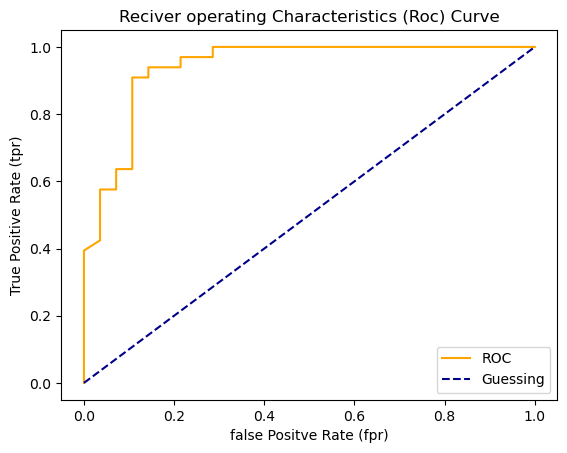

In [83]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given FPR and TPR

    """
    #plotting ROC 
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    #plotting line
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing" )
    #customising the plot 
    plt.xlabel("false Positve Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt. title("Reciver operating Characteristics (Roc) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr,tpr)


    



In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba_pos)

0.941017316017316

## Confusion metrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
in essence giving you an idea of where the model is getting confused

In [85]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  6],
       [ 1, 32]], dtype=int64)

In [86]:
# visualizing the confusion matrics
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["predicted Labels"])

predicted Labels,0,1
Actual Labels,,
0,22,6
1,1,32


In [87]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64


Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000028E359177D0>: Failed to resolve 'repo.anaconda.com' ([Errno 11001] getaddrinfo failed)")': /pkgs/msys2/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000028E3593C3E0>: Failed to resolve 'repo.anaconda.com' ([Errno 11001] getaddrinfo failed)")': /pkgs/r/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000028E3593C260>: Failed to resolve 'repo.anaconda.com' ([Errno 11001] getaddrinfo failed)")': /pkgs/main/notices.json

Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'Name

<Axes: >

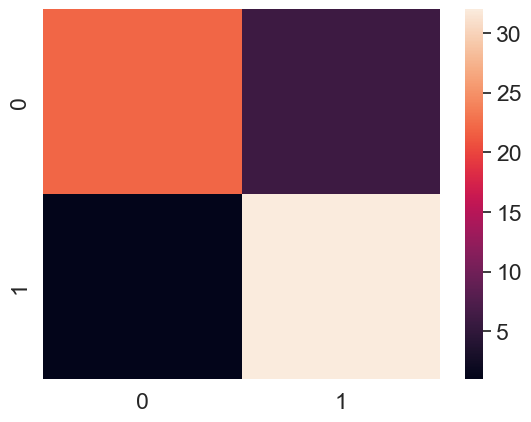

In [88]:
#using seaborn
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat= confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

In [89]:
import sklearn
sklearn.__version__

'1.4.2'

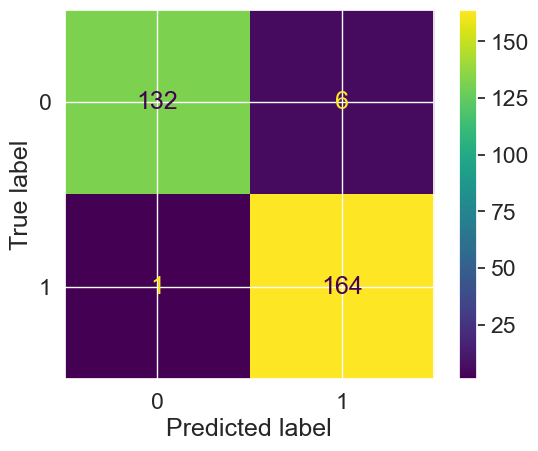

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

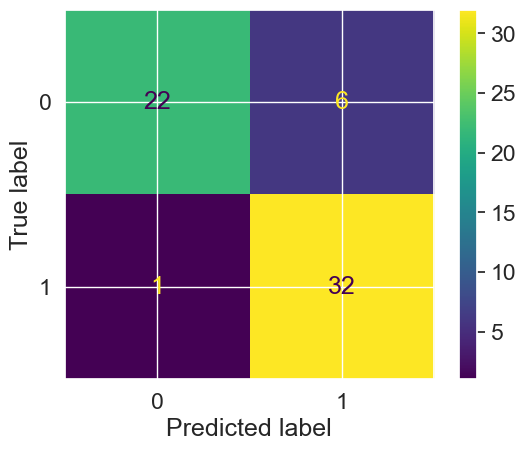

In [91]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

## Classification Report

In [92]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## 4.22 Regression model evaluation metrics

* R^2 (pronounced r-squared)or coefficient of determination
* Mean Absolute Error
* Mean squared error

In [93]:
from sklearn .ensemble import RandomForestRegressor

np.random.seed(43)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

model= RandomForestRegressor()
model.fit(X_train,y_train)



RandomForestRegressor()

In [94]:
model.score(X_test,y_test)

0.8229019604535058

In [95]:
from sklearn.metrics import r2_score


**Mean Absolute error**

MAE is the avg of the absolute difference between prediction and actual values, 
it gives you an idea of how wrong the model predictions are.


In [96]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae= mean_absolute_error(y_test,y_preds)
mae


0.32150092516957385

In [97]:
df=pd.DataFrame(data={"actual value": y_test,
                      "predicted value":y_preds})
df["Differentiate"]=df["predicted value"] - df["actual value"]
df.head(10)

,actual value,predicted value,Differentiate
7310,1.478,1.54723,0.06923
4402,2.192,2.02146,-0.17054
1929,1.734,1.95989,0.22589
11551,1.996,2.01569,0.01969
9882,1.683,1.79673,0.11373
3896,2.003,2.46928,0.46628
16638,2.045,2.01678,-0.02822
6983,2.447,2.08587,-0.36113
20209,2.811,3.03664,0.22564
14854,0.956,1.14774,0.19174


In [98]:
#Mean abs error using formulas 
np.abs(df["Differentiate"]).mean()

0.32150092516957385

**MeanSquaredError**

MSE is the mean of sq of the errors between actual andpredicted values

In [99]:
# Mean Squared values
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_preds)
mae


0.32150092516957385

In [100]:
sq=np.square(df["Differentiate"])
sq.mean()

0.23615719128223436

In [101]:
## 4.2.3 finally using the score parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(43)

X=heart_disease.drop(["target"],axis=1)
y=heart_disease["target"]

clf= RandomForestClassifier()


In [102]:
np.random.seed(42)

#cross val accuracy

cv_acc=cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [103]:
print(f"the cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is :82.48%


In [104]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [105]:
np.random.seed(42)
cv_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pre

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [106]:
print(f"the cross validated precision is :{np.mean(cv_pre)*100:.2f}%")

the cross validated precision is :83.30%


In [107]:
np.random.seed(42)
cv_re = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_re

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [108]:
print(f"the cross validated recall is :{np.mean(cv_re)*100:.2f}%")

the cross validated recall is :85.45%


**Using the scoring parameter for regression model


In [109]:
from sklearn .ensemble import RandomForestRegressor

np.random.seed(43)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

model= RandomForestRegressor()



In [110]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3)
np.mean(cv_r2) 

0.6545458023124507

In [111]:
np.random.seed(42)
cv_mse= cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse) 

-0.46141356443710196

In [112]:
np.random.seed(42)
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae) 

-0.4835773816036823

## 4.3 Using diff evaluation metrics as Scikit Learn Function 

the third way to evaluate scikit learn ML models is to use sklearn .metrics


In [13]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_preds= model.predict(X_test)
y_preds

#accuracy score
accuracy_score(y_test,y_preds),precision_score(y_test,y_preds),recall_score(y_test,y_preds),f1_score(y_test,y_preds)


(0.8524590163934426, 0.8484848484848485, 0.875, 0.8615384615384616)

In [12]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

y_preds=model.predict(X_test)

r2_score(y_test,y_preds),mean_absolute_error(y_test,y_preds),mean_squared_error(y_test,y_preds)

NameError: name 'housing_df' is not defined

## 5. Improving a Model

First prediction are = baseline prediction  
First model = baseline model

### From a Data Perspective:
* **Could we get more data?** (Generally, the more data, the better)
* **Could we improve the data?** (Can we get more depth of feature?)

### From a Model Perspective:
* **Can we use a better model?**
* **Could we improve the current model?**

### Hyperparameters vs Parameters:
* **Parameters**: Model finds these patterns in the data.
* **Hyperparameters**: Settings on a model you can adjust to (potentially) increase its ability to 
### 3 ways to adjust hyperparameters:
    1.By hand
    2.randomly with RandomSearchCv
    3.exahaustively with gridSearchCvfind patterns.


### 5.1 Tuning hyperparamters By hand
lets make three sets trainingm,validation and tes


In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust

    * `max_depth`
    * `max_features`
    * `min_samples_leaf`
    * `min_samples_split`
    * `n_estimators`
    

In [27]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)

    metric_dict = {"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                   "f1":round(f1,2)
                    }
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall_score: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


    

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffling the data
heart_disease_shuffled= heart_disease.sample(frac=1)
#splitting the data in X and y
X= heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
  
# spliiting train,validation and test set
train_split= round(0.7 * len(heart_disease_shuffled))
valid_split=round(train_split + 0.15 * len(heart_disease_shuffled))
X_train,y_train =X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]

X_test,y_test=X[valid_split: ],y[valid_split: ]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#baseline prediction
y_preds = clf.predict(X_valid)

#Evaluating the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)





Acc: 82.22%
Precision: 0.81
Recall_score: 0.88
F1 score: 0.85


In [31]:
np.random.seed(42)
clf2=RandomForestClassifier(max_depth=10)
clf2.fit(X_train,y_train)

#baseline prediction
y_preds2 = clf2.predict(X_valid)

#Evaluating the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds2)

Acc: 80.00%
Precision: 0.81
Recall_score: 0.84
F1 score: 0.82


### 5.2 Hyperparameters tyuning by with RandomizedSearchCv

In [54]:
from sklearn.model_selection import RandomizedSearchCV
grid ={"max_depth":[None,5,10,20,3],
    "max_features":["sqrt"],
    "min_samples_leaf":[1,2,4],
    "min_samples_split":[2,4,6],
    "n_estimators":[10,100,200,500,1000,1200]}

np.random.seed(42)

X=heart_disease_shuffled.drop(["target"],axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

rs_clf= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)

rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200

In [55]:
rs_clf.best_params_



{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 3}

In [57]:
rs_y_preds=rs_clf.predict(X_test)
rs_metr=evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision: 0.76
Recall_score: 0.93
F1 score: 0.84


### 5.3 GRID SEARCH CV

In [67]:
grid2={'max_depth': [None,3],
      'max_features': ['sqrt','log2'],
      'min_samples_leaf': [1, 2],
      'min_samples_split': [2,  6],
      'n_estimators': [ 200, 1200]}


In [61]:
2*1*2*2*3*5

120

In [68]:
from sklearn.model_selection import GridSearchCV


np.random.seed(42)

X=heart_disease_shuffled.drop(["target"],axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

gs_clf= GridSearchCV(estimator=clf,
                          param_grid=grid2,
                          cv=5,
                          verbose=2)

gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

In [63]:
rs_clf.best_params_


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 3}